# Geely Auto Pricing Case Study

### Problem Statement:

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

The company want to understand the factors affecting the pricing of cars in the American market

They bascically want to know -

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car


## Reading and Understanding the Data

In [139]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [140]:
# Importing all required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm  

In [141]:
# Importing CarPrice_Assignment.csv

carPrice = pd.read_csv('CarPrice_Assignment.csv')

In [142]:
# Displaying the first 5 data of the dataframe.

carPrice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Understanding the columns of the carPrice dataframe.

In [143]:
#Getting more information about each column

carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [144]:
# Observing the statistical data.

carPrice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Visualising the Data

In [145]:
#Visualising numerical data

sns.pairplot(carPrice, height=8)
plt.show()

From visualizing the data through Plot graph we can observe that there is some linear co-relation between Price and Horsepower, Price and enginesize, Price and curbweight

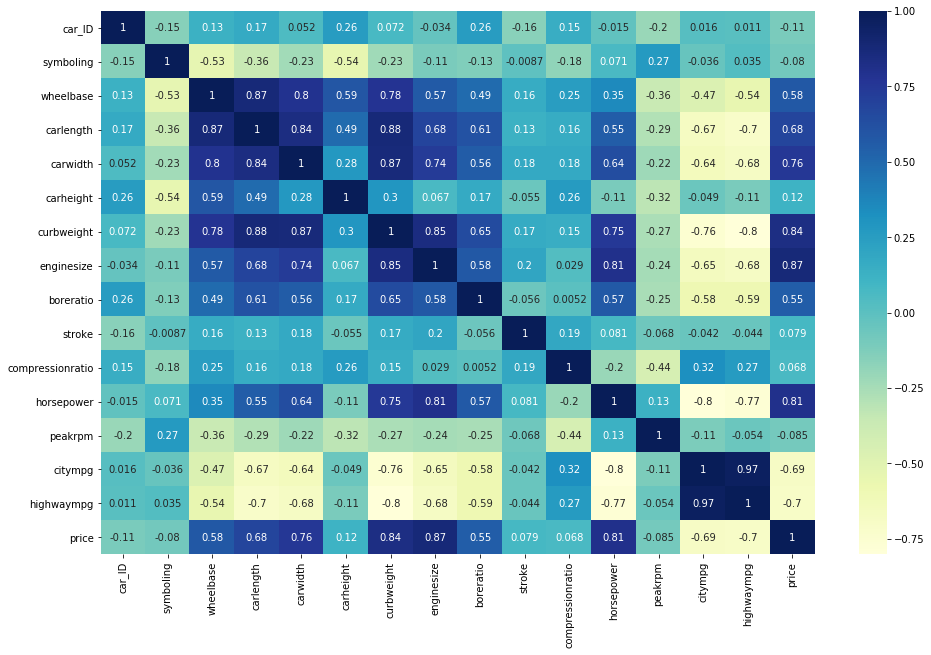

In [146]:
# Plotting a heat map

plt.figure(figsize = (16, 10))
cor=carPrice.corr()
sns.heatmap(cor, annot = True, cmap="YlGnBu")
plt.show()

From the above plotting we can see that there is some correlation between the varibles.
Like if we consider 'price', the variables which show some positive influence are:

- Wheel base
- Car length
- Car width
- Curbweight
- Engine size
- Bore ratio
- Horsepower

Let us see using Linear regression which all variables are affecting the price of the cars.

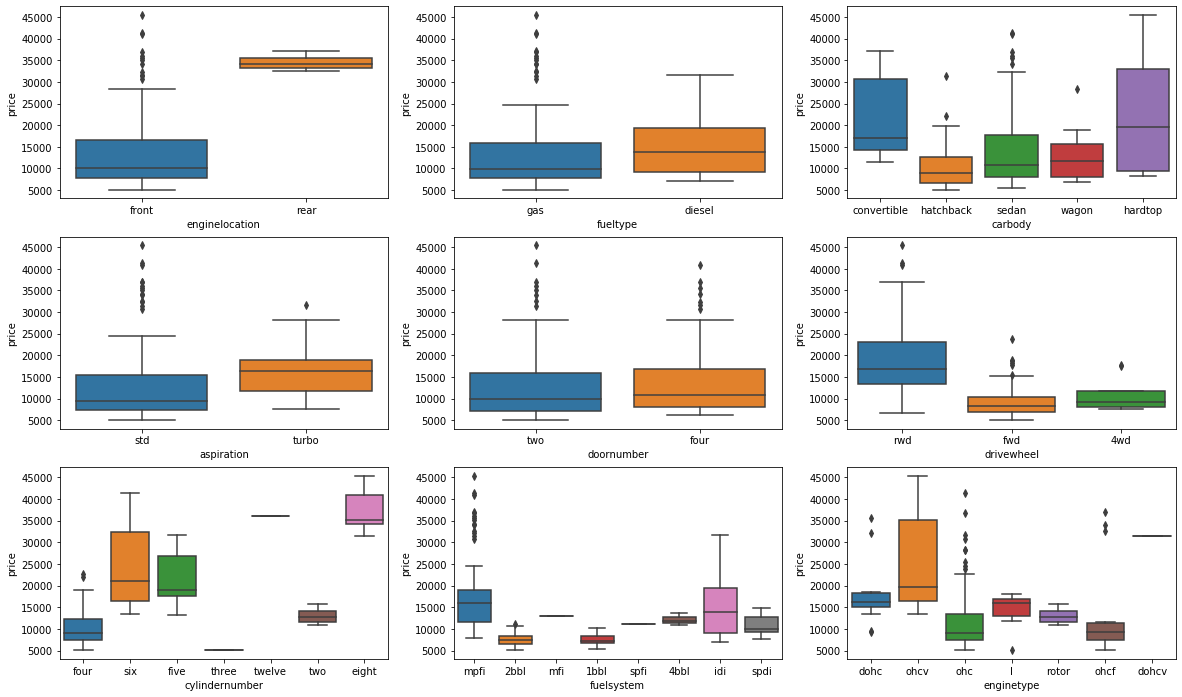

In [147]:
# Visualising the affect of the categorical variables with the price variable

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'enginelocation', y = 'price', data = carPrice)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = carPrice)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = carPrice)
plt.subplot(3,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carPrice)
plt.subplot(3,3,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carPrice)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carPrice)
plt.subplot(3,3,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carPrice)
plt.subplot(3,3,8)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carPrice)
plt.subplot(3,3,9)
sns.boxplot(x = 'enginetype', y = 'price', data = carPrice)
plt.show()

From the above plots we make few observations like:

- The cars with engine at the rear side are having a high price.
- The car body is of convertible type or hardtop type thenalso it is having high price.
- The cars with aspiration as turbo is having a hight price as compared to standard type.
- The cars with drive wheel 'rwd' is quoted high.
- The cars which have cylinder number 3 are having the lowest price.

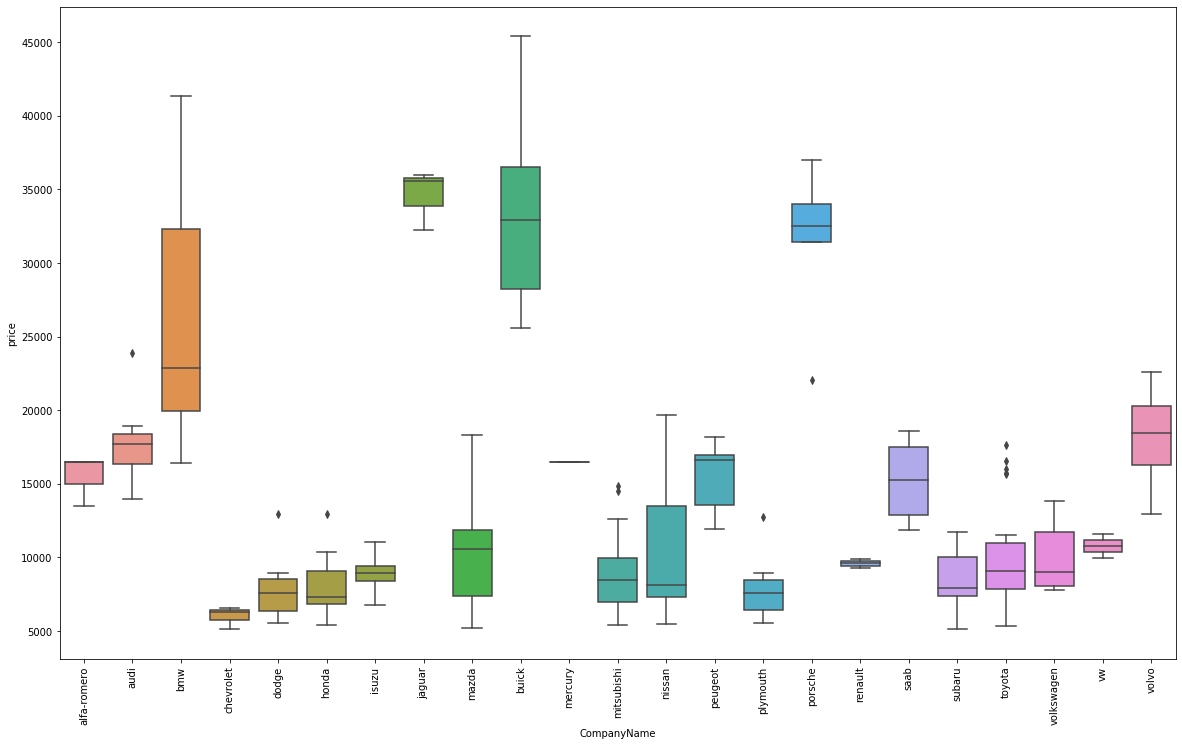

In [148]:
#Split the 'CarName' column to keep only the company name and plot against price factor.

carPrice['CompanyName'] = carPrice['CarName'].str.split(' ').str[0]
plt.figure(figsize=(20, 12))
sns.boxplot(x = 'CompanyName', y = 'price', data = carPrice)
plt.xticks(rotation=90)
plt.show()


From the above plot we can see-

- The company 'BMW' has a wider market share in the range 20K to approx 35K with only company buick as a competitor for the higher end cars.
- Similarly for the lower end the company Chevrolet is having less competitors keeping the price range in mind.

# Data preparation

In [149]:
# Displaying the car company names to see if there are any duplicates.

carPrice['CompanyName'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen     10
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [150]:
# Get dummie variable for the car company names and drop one column.

carcompany = pd.get_dummies(carPrice['CompanyName'], drop_first = True)
carcompany.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,vw
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
# Drop the 'CompanyName','CarName' columns from the carPrice dataframe as they are not needed anymore.

carPrice.drop(['CompanyName','CarName'], axis = 1, inplace = True)
carPrice.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [152]:
# Convering the categorical variable 'fueltype' to get the dummy variables.

fuelType = pd.get_dummies(carPrice['fueltype'], drop_first = True)
fuelType.head()

,gas
0,1
1,1
2,1
3,1
4,1


In [153]:
# Drop the column 'fueltype' as it is not needed anymore.

carPrice.drop(['fueltype'], axis = 1, inplace = True)

In [154]:
# Convering the categorical variable 'carbody' to get the dummy variables.

carbody = pd.get_dummies(carPrice['carbody'], drop_first = True)
carbody.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


We can drop one column as we can identify without even using 'rwd' column as below:

- 0000 will correspond to convertible
- 1000 will correspond to hardtop
- 0100 will correspond to hatchback
- 0010 will correspond to sedan
- 0001 will correspond to wagon

In [155]:
# Drop the column 'carbody' as it is not needed anymore.

carPrice.drop(['carbody'], axis = 1, inplace = True)
carPrice.head()

,car_ID,symboling,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,std,two,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,std,two,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,std,four,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,std,four,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [156]:
# Convering the categorical variable 'aspiration' to get the dummy variables.

aspiration = pd.get_dummies(carPrice['aspiration'], drop_first = True)

# Drop the column 'aspiration' as it is not needed anymore.

carPrice.drop(['aspiration'], axis = 1, inplace = True)
carPrice.head()

,car_ID,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,two,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,two,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,two,rwd,front,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,four,fwd,front,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,four,4wd,front,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [157]:
# Convering the categorical variable 'doornumber' to get the dummy variables.

doornumber = {"two":0, "four":1}
carPrice['doornumber'] = carPrice.doornumber.map(doornumber)
carPrice.head()

,car_ID,symboling,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,rwd,front,88.6,168.8,64.1,48.8,2548,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,rwd,front,94.5,171.2,65.5,52.4,2823,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,fwd,front,99.8,176.6,66.2,54.3,2337,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,4wd,front,99.4,176.6,66.4,54.3,2824,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [158]:
# Convering the categorical variable 'drivewheel' to get the dummy variables.

drivewheel = pd.get_dummies(carPrice['drivewheel'], drop_first = True)
drivewheel.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [159]:
# Drop the column 'drivewheel' as it is not needed anymore.

carPrice.drop(['drivewheel'], axis = 1, inplace = True)

We can drop one column as we can identify without even using all the 3 columns as below:

- `00` will correspond to `4wd`
- `01` will correspond to `rwd`
- `10` will correspond to `fwd`

In [160]:
# Convering the categorical variable 'enginelocation' to get the dummy variables.

enginelocation = pd.get_dummies(carPrice['enginelocation'], drop_first = True)
enginelocation.head()

,rear
0,0
1,0
2,0
3,0
4,0


In [161]:
# Drop the column 'enginelocation' as it is not needed anymore.

carPrice.drop(['enginelocation'], axis = 1, inplace = True)

In [162]:
# Converting the cylinder number to dummie variables as the cylinder number looks unorered variable.

cylindernumber = pd.get_dummies(carPrice['cylindernumber'], drop_first = True)
cylindernumber.rename(columns = {'four':'Four_cylinder', 'two':'Two_cylinder', 'six':'Six_cylinder','five':'Five_cylinder',
                                'three':'Three_cylinder','twelve':'Twelve_cylinder', 'eight':'Eight_cylinder'}, inplace = True)
cylindernumber.head()

,Five_cylinder,Four_cylinder,Six_cylinder,Three_cylinder,Twelve_cylinder,Two_cylinder
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [163]:
# Drop the column 'cylindernumber' as it is not needed anymore.

carPrice.drop(['cylindernumber'], axis = 1, inplace = True)

In [164]:
# Encoding the symboling variable.

symboling = {-3: 6, -2: 5, -1: 4, 0: 3, 1: 2, 2: 1, 3:0 }

In [165]:
carPrice['symbolingEnc'] = carPrice.symboling.map(symboling)
carPrice.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symbolingEnc
0,1,3,0,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,3,0,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,1,0,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,2,1,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,2,1,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [166]:
# Drop the column 'symboling' as it is not needed anymore.

carPrice.drop(['symboling'], axis = 1, inplace = True)
carPrice.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symbolingEnc
0,1,0,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,0,88.6,168.8,64.1,48.8,2548,dohc,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,0,94.5,171.2,65.5,52.4,2823,ohcv,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,1,99.8,176.6,66.2,54.3,2337,ohc,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,1,99.4,176.6,66.4,54.3,2824,ohc,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [167]:
# Convering the categorical variable 'enginetype' to get the dummy variables.

enginetype = pd.get_dummies(carPrice['enginetype'], drop_first = True)
enginetype.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [168]:
# Drop the column 'enginetype' as it is not needed anymore.

carPrice.drop(['enginetype'], axis = 1, inplace = True)
carPrice.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symbolingEnc
0,1,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,0,88.6,168.8,64.1,48.8,2548,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,0,94.5,171.2,65.5,52.4,2823,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,1,99.8,176.6,66.2,54.3,2337,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,1,99.4,176.6,66.4,54.3,2824,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [169]:
# Convering the categorical variable 'fuelsystem' to get the dummy variables.

fuelsystem = pd.get_dummies(carPrice['fuelsystem'], drop_first = True)
fuelsystem.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [170]:
# Drop the column 'fuelsystem' as it is not needed anymore.

carPrice.drop(['fuelsystem'], axis = 1, inplace = True)
carPrice.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symbolingEnc
0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0
1,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0
2,3,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,2
3,4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,1
4,5,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,1


In [171]:
# Merging the fuelType, carbody, aspiration, drivewheel,carcompany, enginetype, fuelsystem, cylindernumber 
# and enginelocation variables to the carPrice dataframe.

carPrice = pd.concat([carPrice,fuelType,carbody,aspiration, drivewheel, enginelocation,carcompany, enginetype, fuelsystem, cylindernumber], axis=1)
carPrice.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,mfi,mpfi,spdi,spfi,Five_cylinder,Four_cylinder,Six_cylinder,Three_cylinder,Twelve_cylinder,Two_cylinder
0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,1,0,0,0,0
1,2,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,0,0,1,0,0,0,0
2,3,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,0,0,0,1,0,0,0
3,4,1,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,1,0,0,0,1,0,0,0,0
4,5,1,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,1,0,0,1,0,0,0,0,0


In [172]:
# Get the information of the columns after converting them.

carPrice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   doornumber        205 non-null    int64  
 2   wheelbase         205 non-null    float64
 3   carlength         205 non-null    float64
 4   carwidth          205 non-null    float64
 5   carheight         205 non-null    float64
 6   curbweight        205 non-null    int64  
 7   enginesize        205 non-null    int64  
 8   boreratio         205 non-null    float64
 9   stroke            205 non-null    float64
 10  compressionratio  205 non-null    float64
 11  horsepower        205 non-null    int64  
 12  peakrpm           205 non-null    int64  
 13  citympg           205 non-null    int64  
 14  highwaympg        205 non-null    int64  
 15  price             205 non-null    float64
 16  symbolingEnc      205 non-null    int64  
 1

## Splitting the Data into Training and Testing Sets

In [173]:
df_train, df_test = train_test_split(carPrice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the variables using Min-Max scaling so that the units of the coefficients obtained are all on the same scale

In [174]:
scaler = MinMaxScaler()

In [175]:
# Apply scaler() to all the columns except the 'dummy' variables and door number column as the value is already in 0 and 1.

num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price','symbolingEnc']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,mfi,mpfi,spdi,spfi,Five_cylinder,Four_cylinder,Six_cylinder,Three_cylinder,Twelve_cylinder,Two_cylinder
122,123,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,...,0,0,0,0,0,1,0,0,0,0
125,126,0,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,...,0,1,0,0,0,1,0,0,0,0
166,167,0,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,...,0,1,0,0,0,1,0,0,0,0
1,2,0,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,...,0,1,0,0,0,1,0,0,0,0
199,200,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,...,0,1,0,0,0,1,0,0,0,0


In [176]:
df_train.describe()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,mfi,mpfi,spdi,spfi,Five_cylinder,Four_cylinder,Six_cylinder,Three_cylinder,Twelve_cylinder,Two_cylinder
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,98.524476,0.559441,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,...,0.0,0.440559,0.041958,0.0,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,58.977655,0.498199,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,...,0.0,0.498199,0.201198,0.0,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.500000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,97.000000,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,...,0.0,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,147.500000,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,...,0.0,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Spliting the 'price' variable to y as 'y_train' and rest all variables in x as 'x_train' 

In [177]:
y_train = df_train.pop('price')
X_train = df_train

In [178]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [179]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 53),
 ('doornumber', False, 49),
 ('wheelbase', False, 17),
 ('carlength', False, 21),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', False, 2),
 ('compressionratio', False, 25),
 ('horsepower', False, 15),
 ('peakrpm', False, 16),
 ('citympg', False, 39),
 ('highwaympg', False, 26),
 ('symbolingEnc', False, 43),
 ('gas', False, 29),
 ('hardtop', False, 31),
 ('hatchback', False, 30),
 ('sedan', False, 32),
 ('wagon', False, 33),
 ('turbo', False, 14),
 ('fwd', False, 54),
 ('rwd', False, 42),
 ('rear', True, 1),
 ('audi', False, 37),
 ('bmw', True, 1),
 ('buick', False, 38),
 ('chevrolet', False, 23),
 ('dodge', False, 20),
 ('honda', False, 22),
 ('isuzu', False, 52),
 ('jaguar', False, 27),
 ('mazda', False, 45),
 ('mercury', False, 55),
 ('mitsubishi', False, 13),
 ('nissan', False, 44),
 ('peugeot', False, 6),
 ('plymouth', False, 19),
 ('porsche', True, 1),
 ('renault',

In [180]:
# Columns which are in top 10 factors affecting the price.

col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rear', 'bmw',
       'porsche', 'rotor', 'Three_cylinder', 'Twelve_cylinder'],
      dtype='object')

In [181]:
# Columns which are not in top 10 factors affecting the price.

X_train.columns[~rfe.support_]

Index(['car_ID', 'doornumber', 'wheelbase', 'carlength', 'carheight', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'symbolingEnc', 'gas', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'turbo', 'fwd', 'rwd', 'audi', 'buick', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'nissan',
       'peugeot', 'plymouth', 'renault', 'saab', 'subaru', 'toyota',
       'volkswagen', 'volvo', 'vw', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'Five_cylinder',
       'Four_cylinder', 'Six_cylinder', 'Two_cylinder'],
      dtype='object')

In [182]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [183]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [184]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [185]:
# Summary of our 1st linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.21e-64
Time:                        23:54:27   Log-Likelihood:                 190.87
No. Observations:                 143   AIC:                            -359.7
Df Residuals:                     132   BIC:                            -327.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1594      0.019     

In [186]:
# Displaying columns part of the modeling
X_train_rfe.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'rear',
       'bmw', 'porsche', 'rotor', 'Three_cylinder', 'Twelve_cylinder'],
      dtype='object')

In [187]:
# Dropping the constant column
X_train_new = X_train_rfe.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rear', 'bmw',
       'porsche', 'rotor', 'Three_cylinder', 'Twelve_cylinder'],
      dtype='object')

In [188]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Car_Data,VIF
1,curbweight,41.06
0,carwidth,25.19
2,enginesize,24.95
3,boreratio,9.78
6,porsche,1.67
4,rear,1.61
9,Twelve_cylinder,1.50
7,rotor,1.27
5,bmw,1.18
8,Three_cylinder,1.01


#### As we can observe from the model the P-value of 12 cylinder is higher that 0.05 so we can drop that column and see the new model after dropping the column.

In [189]:
X_train_afterDrop = X_train_rfe.drop(['Twelve_cylinder'], axis=1) # Drop column Twelve_cylinder as p-value > 0.05
X_train_afterDrop.columns

Index(['const', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'rear',
       'bmw', 'porsche', 'rotor', 'Three_cylinder'],
      dtype='object')

In [190]:
# Adding a constant variable 
X_train_afterDrop_fr = sm.add_constant(X_train_afterDrop)

In [191]:
lm_1 = sm.OLS(y_train,X_train_afterDrop_fr).fit()   # Running the linear model

In [192]:
# Summary of our 2nd linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.9
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.18e-65
Time:                        23:54:27   Log-Likelihood:                 190.63
No. Observations:                 143   AIC:                            -361.3
Df Residuals:                     133   BIC:                            -331.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1587      0.018     -8.

In [193]:
# Dropping the constant column

X_train_new = X_train_afterDrop_fr.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'rear', 'bmw',
       'porsche', 'rotor', 'Three_cylinder'],
      dtype='object')

In [194]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Car_Data,VIF
1,curbweight,38.41
0,carwidth,24.99
2,enginesize,17.70
3,boreratio,9.70
6,porsche,1.66
4,rear,1.60
7,rotor,1.21
5,bmw,1.14
8,Three_cylinder,1.01


#### As we can observe from the model the VIF of 'curbweight' is very high so we can drop that column and see the new model after dropping the column.

In [195]:
# Drop 'curbweight' as VIF value is very high.

X_train_afterDrop_cw = X_train_afterDrop_fr.drop(['curbweight'], axis=1)
X_train_afterDrop_cw.columns

Index(['const', 'carwidth', 'enginesize', 'boreratio', 'rear', 'bmw',
       'porsche', 'rotor', 'Three_cylinder'],
      dtype='object')

In [196]:
# Adding a constant variable 

X_train_afterDrop_cw = sm.add_constant(X_train_afterDrop_cw)

In [197]:
lm_2 = sm.OLS(y_train,X_train_afterDrop_cw).fit()   # Running the linear model

In [198]:
# Summary of our 3rd linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     152.5
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.01e-63
Time:                        23:54:27   Log-Likelihood:                 182.32
No. Observations:                 143   AIC:                            -346.6
Df Residuals:                     134   BIC:                            -320.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1778      0.019     -9.

In [199]:
# Dropping the constant column

X_train_new = X_train_afterDrop_cw.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'enginesize', 'boreratio', 'rear', 'bmw', 'porsche',
       'rotor', 'Three_cylinder'],
      dtype='object')

In [200]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Car_Data,VIF
0,carwidth,16.48
1,enginesize,10.03
2,boreratio,9.35
3,rear,1.60
5,porsche,1.59
6,rotor,1.17
4,bmw,1.14
7,Three_cylinder,1.01


#### As we can observe from the model the P-value of  'boreratio' is higher that 0.05 so we can drop that column and see the new model after dropping the column.

In [201]:
# Drop column boreratio as p-value > 0.05

X_train_afterDrop_cwid = X_train_afterDrop_cw.drop(['boreratio'], axis=1)
X_train_afterDrop_cwid.columns

Index(['const', 'carwidth', 'enginesize', 'rear', 'bmw', 'porsche', 'rotor',
       'Three_cylinder'],
      dtype='object')

In [202]:
# Add a constant column

X_train_afterDrop_cwid = sm.add_constant(X_train_afterDrop_cwid)

In [203]:
lm_3 = sm.OLS(y_train,X_train_afterDrop_cwid).fit()   # Running the linear model

In [204]:
# Summary of our 4th linear model

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     171.1
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           7.04e-64
Time:                        23:54:27   Log-Likelihood:                 180.65
No. Observations:                 143   AIC:                            -345.3
Df Residuals:                     135   BIC:                            -321.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1925      0.017    -11.

In [205]:
# Dropping the constant column

X_train_new = X_train_afterDrop_cwid.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'enginesize', 'rear', 'bmw', 'porsche', 'rotor',
       'Three_cylinder'],
      dtype='object')

In [206]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Car_Data,VIF
1,enginesize,9.98
0,carwidth,9.69
2,rear,1.58
4,porsche,1.57
5,rotor,1.16
3,bmw,1.14
6,Three_cylinder,1.00


#### As we can observe from the model the P-value of  'porsche' is higher that 0.05 so we can drop that column and see the new model after dropping the column.

In [207]:
# Drop column porsche as p-value > 0.05

X_train_afterDrop_ez = X_train_new.drop(['porsche'], axis=1)
X_train_afterDrop_ez.columns

Index(['carwidth', 'enginesize', 'rear', 'bmw', 'rotor', 'Three_cylinder'], dtype='object')

In [208]:
# Add a constant column

X_train_afterDrop_ez = sm.add_constant(X_train_afterDrop_ez)

In [209]:
lm_4 = sm.OLS(y_train,X_train_afterDrop_ez).fit()   # Running the linear model

In [210]:
# Summary of our 5th linear model

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     197.0
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.62e-64
Time:                        23:54:27   Log-Likelihood:                 179.35
No. Observations:                 143   AIC:                            -344.7
Df Residuals:                     136   BIC:                            -324.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1976      0.017    -11.

In [211]:
# Dropping the constant column

X_train_new = X_train_afterDrop_ez.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'enginesize', 'rear', 'bmw', 'rotor', 'Three_cylinder'], dtype='object')

In [212]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Car_Data,VIF
1,enginesize,9.98
0,carwidth,9.63
4,rotor,1.16
3,bmw,1.13
2,rear,1.08
5,Three_cylinder,1.00


#### As we can observe from the model the VIF of 'enginesize' is high so we can drop that column and see the new model after dropping the column.

In [213]:
# Drop the coumn 'enginesize' as it has a hign VIF.

X_train_afterDrop_st = X_train_new.drop(['enginesize'], axis=1)
X_train_afterDrop_st.columns

Index(['carwidth', 'rear', 'bmw', 'rotor', 'Three_cylinder'], dtype='object')

In [214]:
# Add a constant column
X_train_afterDrop_st = sm.add_constant(X_train_afterDrop_st)

In [215]:
lm_5 = sm.OLS(y_train,X_train_afterDrop_st).fit()   # Running the linear model

# Summary of our 6th linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     115.8
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           2.02e-47
Time:                        23:54:27   Log-Likelihood:                 135.20
No. Observations:                 143   AIC:                            -258.4
Df Residuals:                     137   BIC:                            -240.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2348      0.022    -10.

In [216]:
# Dropping the constant column

X_train_new = X_train_afterDrop_st.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'rear', 'bmw', 'rotor', 'Three_cylinder'], dtype='object')

In [217]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Car_Data,VIF
0,carwidth,1.08
2,bmw,1.05
3,rotor,1.02
1,rear,1.00
4,Three_cylinder,1.00


#### As we can observe from the model the P-value of  'rotor' is higher that 0.05 so we can drop that column and see the new model after dropping the column.

In [218]:
# Dropping the column 'rotor' as the P value is > 0.05

X_train_afterDrop_hcv = X_train_new.drop(['rotor'], axis=1)
X_train_afterDrop_hcv.columns

Index(['carwidth', 'rear', 'bmw', 'Three_cylinder'], dtype='object')

In [219]:
# Add a constant column
X_train_afterDrop_hcv = sm.add_constant(X_train_afterDrop_hcv)

In [220]:
lm_6 = sm.OLS(y_train,X_train_afterDrop_hcv).fit()   # Running the linear model

# Summary of our 7th linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     145.3
Date:                Mon, 01 Jun 2020   Prob (F-statistic):           1.92e-48
Time:                        23:54:27   Log-Likelihood:                 134.98
No. Observations:                 143   AIC:                            -260.0
Df Residuals:                     138   BIC:                            -245.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2337      0.022    -10.

In [221]:
# Dropping the constant column

X_train_new = X_train_afterDrop_hcv.drop(['const'], axis=1)
X_train_new.columns

Index(['carwidth', 'rear', 'bmw', 'Three_cylinder'], dtype='object')

In [222]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Car_Data'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Car_Data,VIF
0,carwidth,1.06
2,bmw,1.05
1,rear,1.00
3,Three_cylinder,1.00


#### We can consider the above linear model as all the p-values are below 0.05 and VIF below 5 for the velow variables:
- carwidth
- bmw
- rear
- Three_cylinder

## Residual Analysis of the train data

Let's plot a histogram of the error terms and see if they are also normally distributed

In [223]:
# Using predict() on the last model.
y_train_price = lm_6.predict(X_train_afterDrop_hcv)

Text(0.5, 0, 'Errors')

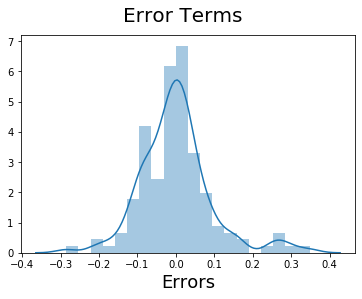

In [224]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### As we can see the error terms has alomst normal distribution and the mean is close to zero

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. 7th model.

#### Applying the scaling on the test sets

In [225]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
            'compressionratio','horsepower','peakrpm','citympg','highwaympg','price','symbolingEnc']

df_test[num_vars] = scaler.transform(df_test[num_vars]) # Transforming the test data using scaler().

df_test.describe()

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,mfi,mpfi,spdi,spfi,Five_cylinder,Four_cylinder,Six_cylinder,Three_cylinder,Twelve_cylinder,Two_cylinder
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0,62.0,62.0
mean,113.322581,0.564516,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,...,0.016129,0.500000,0.048387,0.016129,0.032258,0.854839,0.080645,0.0,0.0,0.0
std,59.300782,0.499868,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,...,0.127000,0.504082,0.216335,0.127000,0.178127,0.355139,0.274512,0.0,0.0,0.0
min,4.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,67.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,117.500000,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,...,0.000000,0.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,167.500000,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,202.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0


#### Spliting the 'price' variable to y as 'y_test' and rest all variables in x as 'x_test' 

In [226]:
# Getting the y_test & X_test

y_test = df_test.pop('price')
X_test = df_test

In [227]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions using the model

y_pred = lm_6.predict(X_test_new)

#### Calculate the R-squared score on the test set.

In [228]:
from sklearn.metrics import r2_score

In [229]:
# calculate the R-squared score on the test set.
r_squared = r2_score(y_test, y_pred)
r_squared

0.7845903341166633

#### As we can observe the r-squared on the test data is 0.78

Text(0, 0.5, 'y_pred')

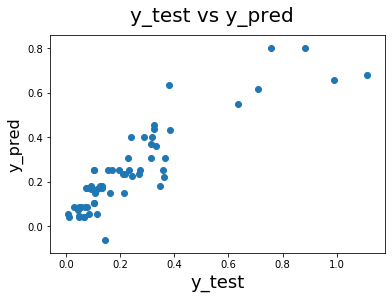

In [230]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

#### From the above analysis we can see that-

##### - r-square train - 0.80
##### - r-square test - 0.78


##### So we can consider the 7th model and as per the model the factors that are affecting the price of the cars in American market are :

- carwidth with coeff of 0.9371 which shows it has a very high impact.
- BMW with coeff of 0.3364 which shows that there is an impact in the price if the car company is BMW 
- rear with coeff of 0.6654 wich shows that if the engine position has an impact.
- Three_cylinder with coeff of 0.2346, where we can observe that the cars with 3 cyclinders have an impact.